In [2]:
#import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
%matplotlib inline
#Load the boston housing dataset
data = pd.read_csv('C:/Users/Shwetha/Downloads/housing1.csv')

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data1=data.dropna()

In [5]:
data1.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
prices=data1['MEDV']
features = data1.drop('MEDV',axis=1)

In [7]:
print("Boston housing dataset has {} data points with {} variables each.".format(*data1.shape))

Boston housing dataset has 394 data points with 14 variables each.


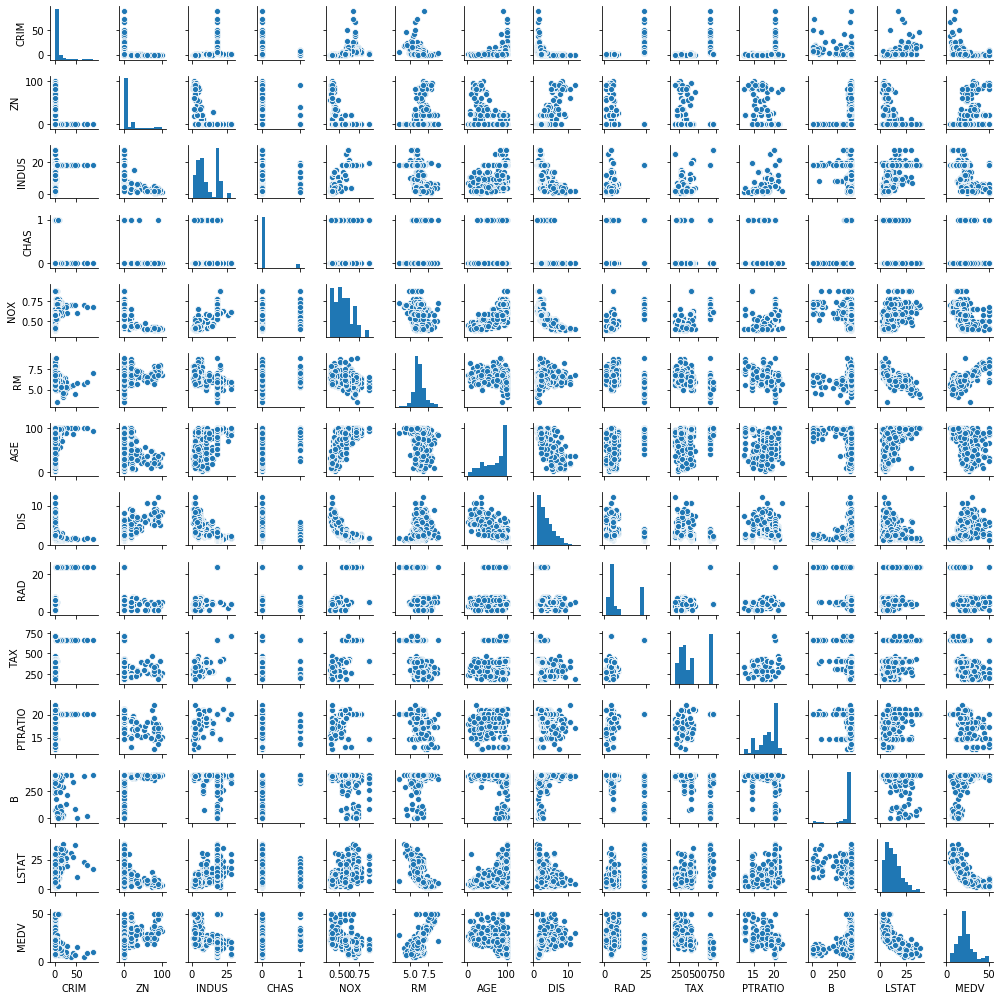

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#calculate and show pairplot
sns.pairplot(data1, height=1.0)
plt.tight_layout()

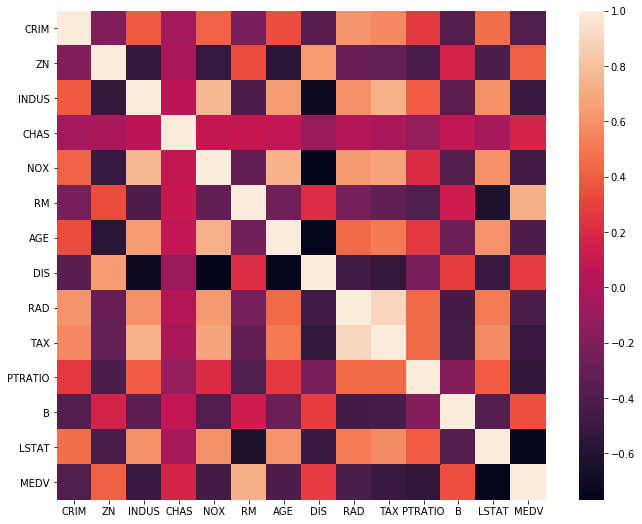

In [9]:
# calculate and show correlation matrix
cols = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
corrmat = data1[cols].corr()
f,ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,square=True)

In [10]:
from sklearn.metrics import r2_score

def performance_metric(y_true,y_predict):
    """Calculates and returns the performance score between true(y_true) and predicted(y_predict) values based on the metric chosen"""
    score = r2_score(y_true,y_predict)
    return score

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(features,prices,test_size = 0.5,random_state = 100)

print("Training and testing split was successful.")

Training and testing split was successful.


In [12]:
#import linear Regressor,and create a linear regressor object
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
# fit the training data to the model using fit.
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
y_predicted = reg.predict(x_test)

In [14]:
y_test

154    17.0
306    33.4
76     20.0
145    13.8
411    17.2
       ... 
320    23.8
117    19.2
318    23.1
135    18.1
44     21.2
Name: MEDV, Length: 197, dtype: float64

In [15]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ",mse)

Mean Squared Error:  21.23466862763752


In [16]:
r2_score(y_test,y_predicted)*100

75.11008199116381

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.30, random_state = 100)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [18]:
reg = fit_model(x_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


In [19]:
y_predicted = reg.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print("Mean Squared Error: ",mse)

Mean Squared Error:  14.390146228741648


In [21]:
r2_score(y_test,y_predicted)

0.8313279260207644